<a href="https://colab.research.google.com/github/svhenrique/analise-dataset-heart-disease/blob/master/semana2/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados sobre mortalidade da insuficiênia cardíaca**


*   O dataset contém 12 recursos que podem ser usados para prever a morte por insuficiência cardíaca.
* [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)   
* Atributos numéricos descrevem:
  * age
    * idade
  * anaemia
    * anemia
  * creatinine_phosphokinase
    * creatinina fosfoquinase 
  * diabetes
    * diabetes
  * ejection_fraction
    * fração de ejeção
  * high_blood_pressure
    * hipertensão arterial
  * platelets
    * plaquetas
  * serum_creatinine
    * creatinina sérica
  * serum_sodium
    * sódio sérico
  * sex
    * sexo
  * smoking
    * fumante
  * time
    * tempo
  * DEATH_EVENT
    * morte

* 298 instâncias
* Problema de classificação binária 





---
Mais detalhes sobre a  organização e análise preliminar dos dados desse dataset
[estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/Untitled0.ipynb).


---
Como é o mesmo dataset que usarei para a modelagem dos dados, não entrarei em tantos detalhes sobre a organização e análise preliminar dos dados nesse notebook.


---






##**1. Importando bibliotecas e métodos necessários**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics  import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

##**2. Lendo dados**

In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('https://raw.githubusercontent.com/svhenrique/analise-dataset-heart-disease/master/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **3. Limpeza e organização dos dados para modelagem**

In [ ]:
# excluindo colunas irrelevantes

dados = dados.drop(columns=['time'])
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [ ]:
# verificando se existem valores NAN, ? ou dados faltantes
dados.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
DEATH_EVENT                 False
dtype: bool

## **4. Re-escala dos dados**

In [ ]:
# Reescala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1.0


## **5. Organizando dados para modelagem**



### **Dividindo os dados em atributores descritos e atributo de classe**

In [ ]:
# X recebe os atributos descritores
tam = len(dados.columns)
X = dados.iloc[:,0:(tam-1)]
print("Coluna apagada: ", set(dados.columns) -set(X.columns))
X.head()


Coluna apagada:  {'DEATH_EVENT'}


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [ ]:
# y recebe o atributo de classe (target)
y = dados.DEATH_EVENT
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 299, dtype: float64

### **Dividindo os dados em treino e teste**
 

In [ ]:
# 20% dos dados serão para teste 
# X_train e y_train serão para treino
# X_test e y_test serão para teste

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## **6. Definindo algoritmo de aprendizado**


### **Árvore de decisão**

#### Criando e treinando arvore

In [ ]:
# definindo modelo de arvore de decisão
arvore = DecisionTreeClassifier()

In [ ]:
# treinando modelo
arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# score de arvore
arvore.score(X_train, y_train)

1.0

In [ ]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (90,60)

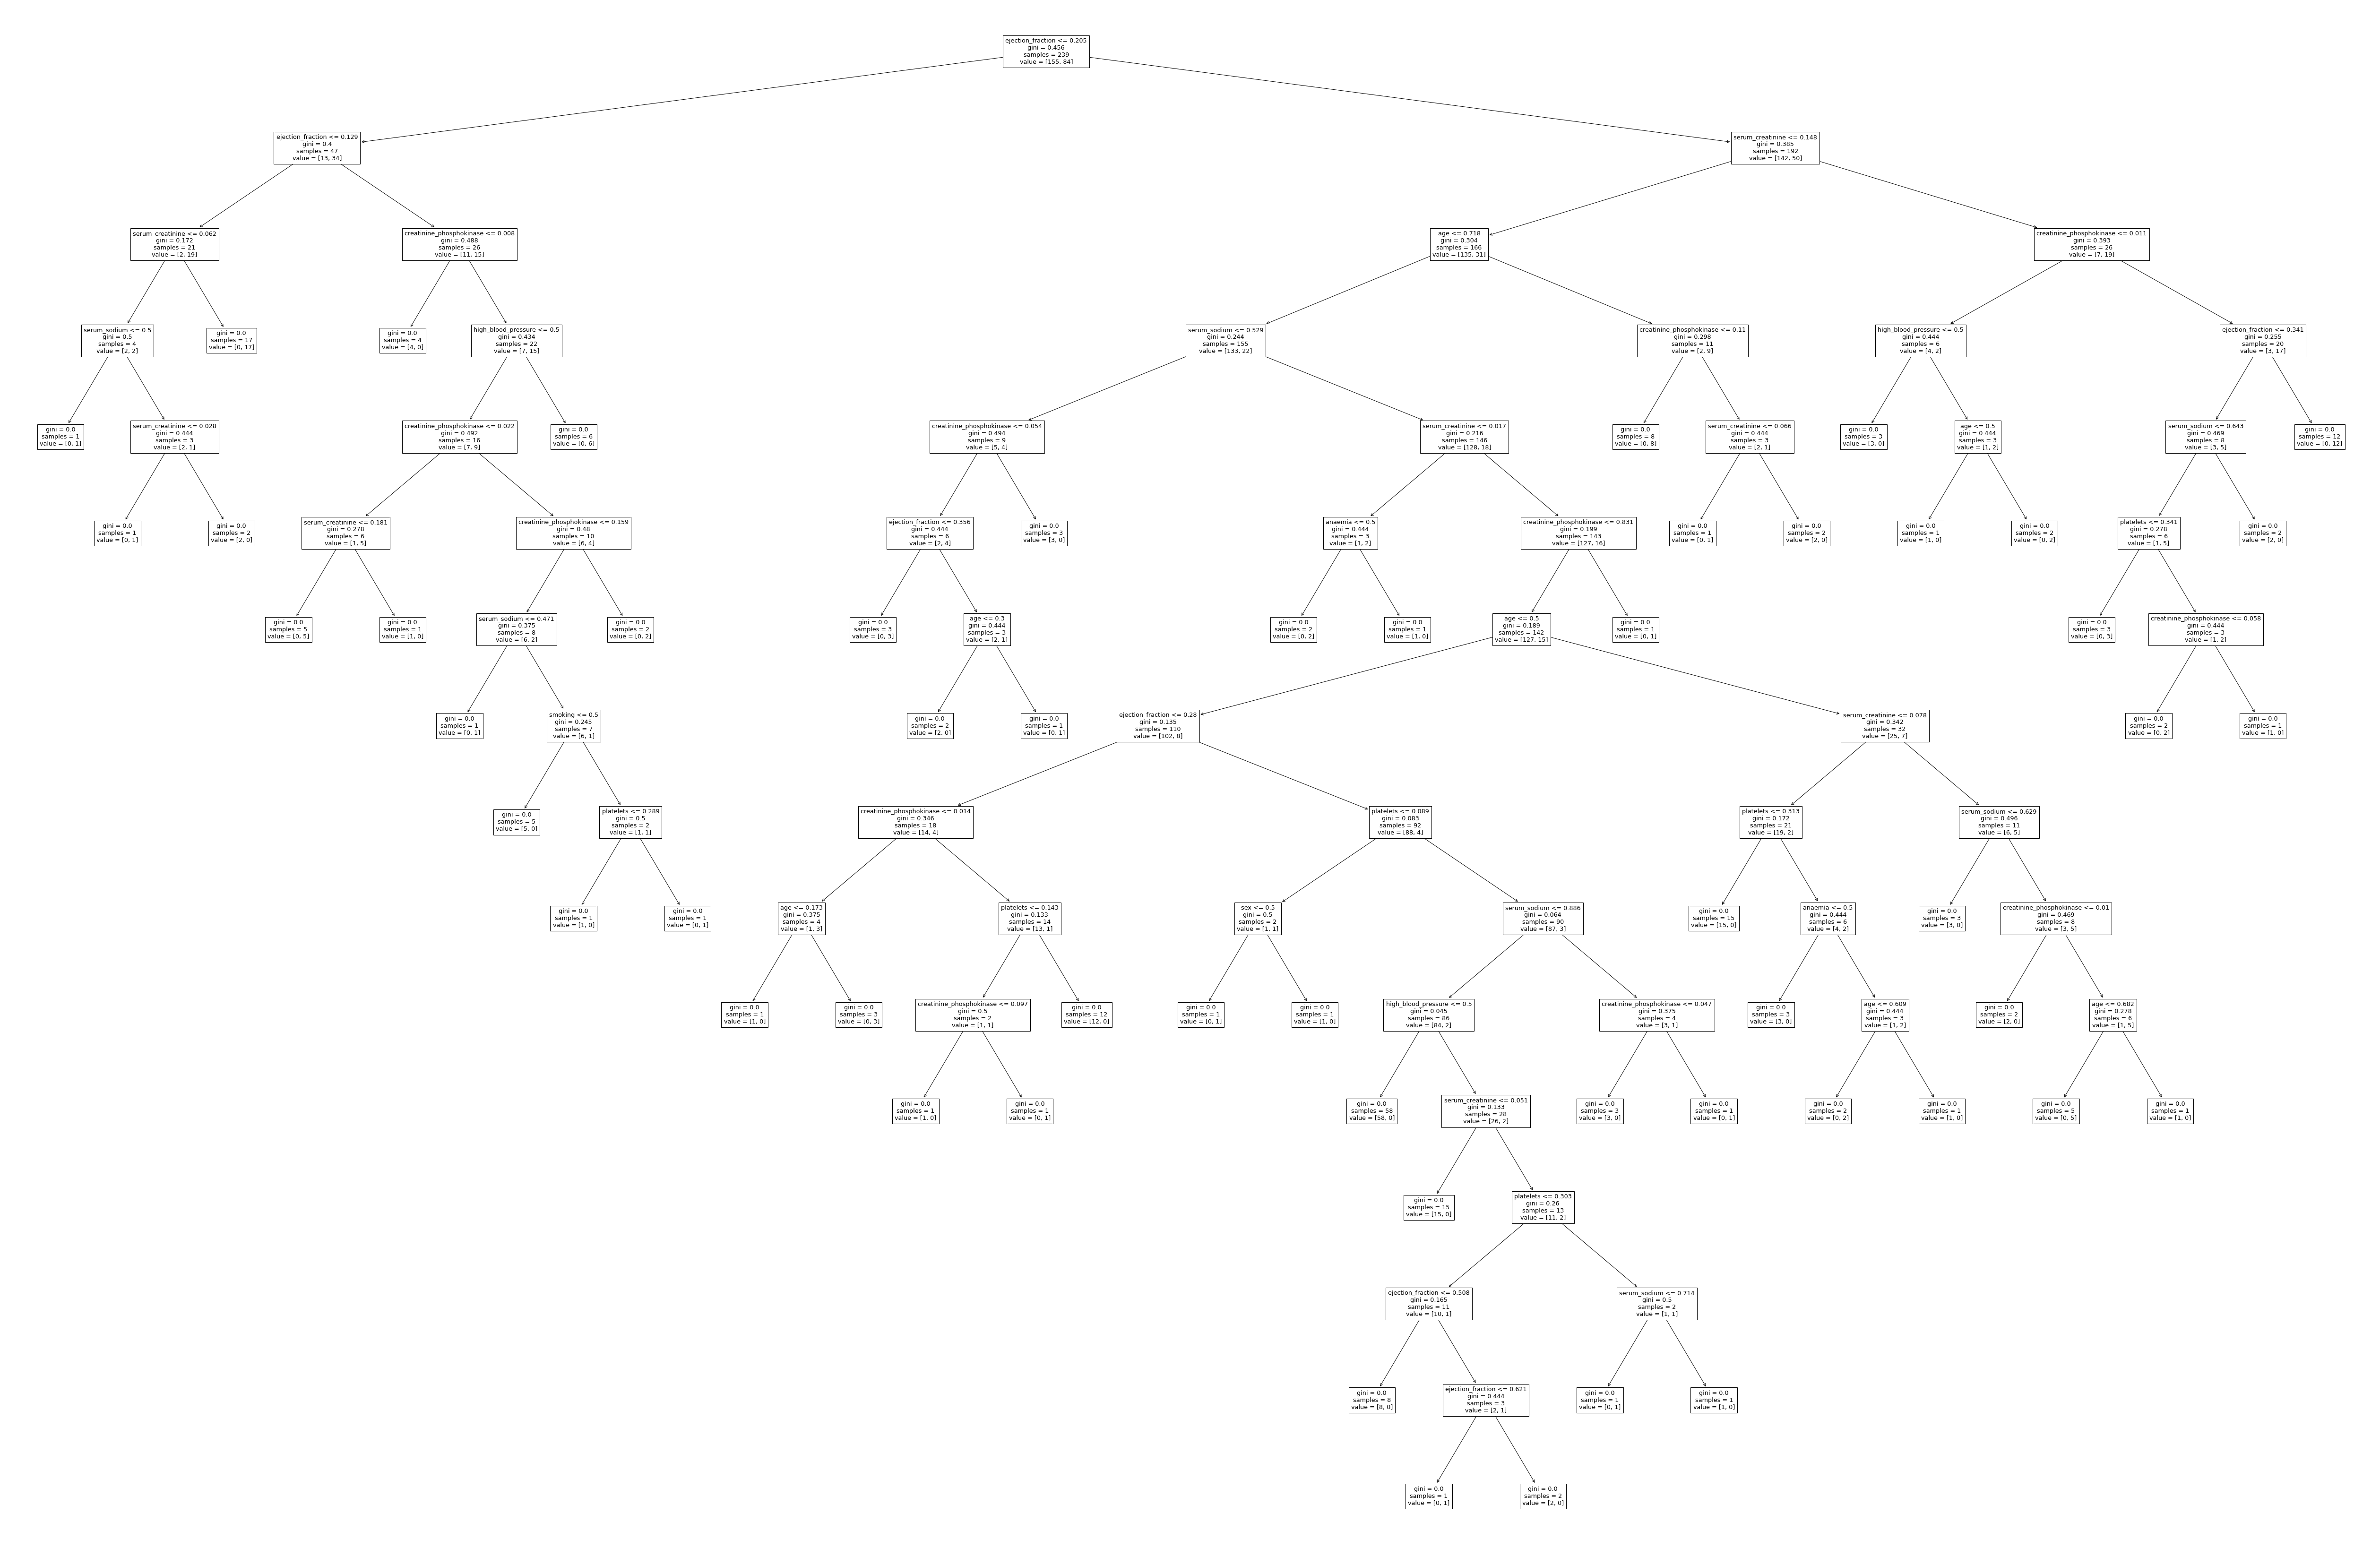

In [ ]:
# muito ruim pra enxergar

plot_tree(arvore,feature_names=X.columns)
plt.show()

In [ ]:
# retornando tamanhos das figuras
plt.rcParams["figure.figsize"] = (8,6)

#### Usando Classificador

In [ ]:
# realizando classificação
clf_arvore = arvore.predict(X_test)
clf_arvore

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0.])

In [ ]:
# script para contar acertos e erros
# investigaremos melhor o número baixo de acertos na avaliação do classificador

acertos = 0
erros = 0
for c in range(len(clf_arvore)):
  if y_test.iloc[c] == clf_arvore[c]:
    acertos += 1
  else:
    erros += 1

print(f"Acertos: {acertos}")
print(f"Erros: {erros}")

Acertos: 44
Erros: 16


In [ ]:
# score da arvore para os teste
arvore.score(X_test, y_test)

0.7333333333333333

#### Avaliação do classificador

In [ ]:
# teste de acurácia

# como o dataset usado é desbalanceado, tem um número maior de instâncias 
# na class 1 (vivos) do que na 0 (mortos), a taxa de acurácia não é uma boa métrica.

acuracia = accuracy_score(y_test,clf_arvore)
acuracia

0.7333333333333333

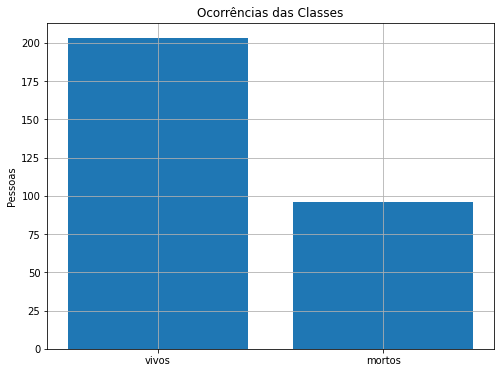

Vivos: 203 | Mortos: 96


In [ ]:
# Mostrando o número de instâncias nas classes 1 (vivos) e 0 (mortos).
# Isso prova que existe um número de instâncias maior na classe 1.

vm = dados.groupby(by=['DEATH_EVENT'])
vm = vm['DEATH_EVENT'].count()

plt.bar(['vivos', 'mortos'], [vm[0], vm[1]])
plt.ylabel('Pessoas')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

print('Vivos: {} | Mortos: {}'.format(vm[0], vm[1]))

In [ ]:
# calculando precisão
precisao = precision_score(y_test,clf_arvore)
precisao

0.375

In [ ]:
# calculando recall
# medida importante  para previsão de morte por insuficiência cardieca, 
# pois, situações de falsos negativos são mais prejudiciais.
recall = recall_score(y_test,clf_arvore)
recall

0.5

In [ ]:
#calculando f1-score
f1 = f1_score(y_test,clf_arvore)
f1

0.42857142857142855

In [ ]:
# calculando coeficientes para curva ROC
fpr, tpr, _  = roc_curve(y_test,clf_arvore)

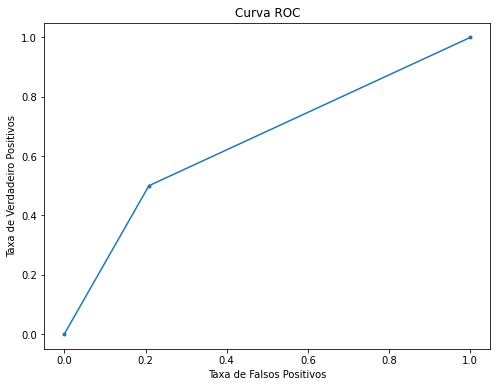

Área sob a curva ROC: 0.6458333333333334


In [ ]:
# plotando curva ROC
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f'Área sob a curva ROC: {roc_auc_score(y_test,clf_arvore)}')

#### Validação cruzada

In [ ]:
# montando os folds para a validação cruzada
kf = KFold(n_splits=5)

In [ ]:
# avaliando modelo com cross validation usando 5 folders
arvore2 = DecisionTreeClassifier()
scores = cross_val_score(arvore2,X,y,cv=5)
scores

array([0.61666667, 0.71666667, 0.66666667, 0.7       , 0.6440678 ])

In [ ]:
# vendo a acurácia média
scores.mean()

0.6688135593220339

#### Conclusão


---
Analisando todos os métodos de avaliação, é possível concluir que o classificador, arvore de decisão, tem uma taxa de acertos que gira em torno de 70%. Suponho que, com algumas modificações, é possível aumentar esse valor.

Os motivos que, imagino eu, estão influenciando a diminuição da taxa de acerto na classificação:


1.   Desbalanceamento das instâncias em relação as classes
2.   Tipos de atributos que corroboram minimamente, se comparado a outros, ou não corroboram em nada, para a discriminação.
3. Algoritmo de classificação não se adequou bem aos dados.

Testarei todas essas hipoteses ao decorrer do notebook.


---



### **Random Forest**

#### Criando e Treinando Random Forest

In [ ]:
# definindo e treinando random forest com 150 árvores
floresta = RandomForestClassifier(n_estimators=200)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# calculando o score da random forest
floresta.score(X_train, y_train)

1.0

#### Usando Classificador

In [ ]:
# realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [ ]:
# calculando o score da random forest para teste
floresta.score(X_test, y_test)

0.7166666666666667

#### Avaliação do classificador

In [ ]:
# teste de acurácia
f_acuracia = accuracy_score(y_test,clf_floresta)
f_acuracia

0.7166666666666667

In [ ]:
# calculando precisão
f_precisao = precision_score(y_test, clf_floresta)
f_precisao

0.35294117647058826

In [ ]:
# calculando recall
f_recall = recall_score(y_test, clf_floresta)
f_recall

0.5

In [ ]:
# calculando f1-score
f_f1 = f1_score(y_test,clf_floresta)
f_f1

0.41379310344827586

In [ ]:
# calculando coeficientes para curva ROC
f_fpr, f_tpr, _  = roc_curve(y_test,clf_floresta)

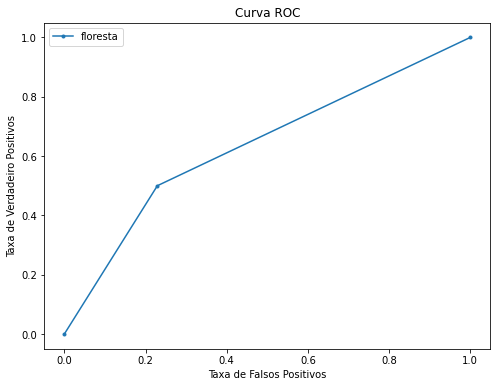

Área sob a curva ROC: 0.6354166666666666


In [ ]:
#plotando curvas
plt.plot(f_fpr,f_tpr,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f'Área sob a curva ROC: {roc_auc_score(y_test,clf_floresta)}')

#### Validação Cruzada

In [ ]:
# avaliando modelo com cross validation usando 5 folders
floresta2 = RandomForestClassifier()
f_scores = cross_val_score(floresta2,X,y,cv=5)
f_scores

array([0.71666667, 0.7       , 0.75      , 0.76666667, 0.77966102])

In [ ]:
f_scores.mean()

0.7425988700564972

#### Conclusão




---

O método de classificaço random forest, a princípio, apresenta um resultado melhor que o da arvore de decisão na discriminação. Mas, ainda suspeito que é possível melhorar a taxa de acertos. Portanto, é preciso de métodos que deixem a discriminação mais eficiente.

Uma comparação mais detalhada entre os dois métodos será feita mais a frente.

---



### **Comparando Árvore de Decisão e Random Forest**

In [ ]:
# comparando scores
arvore.score(X_test, y_test), floresta.score(X_test, y_test)

(0.7333333333333333, 0.7166666666666667)

In [ ]:
# Comparando acurácia
acuracia, f_acuracia

(0.7333333333333333, 0.7166666666666667)

In [ ]:
# comparando precisao
precisao, f_precisao

(0.375, 0.35294117647058826)

In [ ]:
# comparando recall
recall, f_recall

(0.5, 0.5)

In [ ]:
# comparando f1
f1, f_f1

(0.42857142857142855, 0.41379310344827586)

In [ ]:
# relação de scores média feita com validação cruzada
a_scores = cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
f_scores = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('arvore: ', a_scores)
print('floresta: ', f_scores )
a_scores.mean(), f_scores.mean()

arvore:  [0.68333333 0.71666667 0.7        0.71666667 0.69491525]
floresta:  [0.7        0.7        0.78333333 0.78333333 0.77966102]


(0.7023163841807909, 0.7492655367231638)

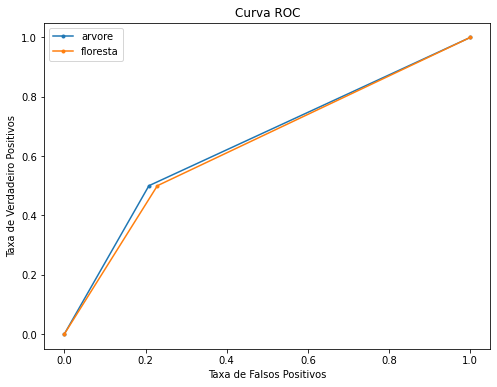

Área sob a curva ROC - floresta: 0.6354166666666666
Área sob a curva ROC - arvore: 0.6458333333333334


In [ ]:
plt.plot(fpr,tpr,marker='.',label='arvore')
plt.plot(f_fpr,f_tpr,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f'Área sob a curva ROC - floresta: {roc_auc_score(y_test,clf_floresta)}')
print(f'Área sob a curva ROC - arvore: {roc_auc_score(y_test,clf_arvore)}')

#### Conclusão



---

Podemos observar que a Random Forest tem, em geral, resultados melhores na classificação do que a Arvore de Decisão para os dados apresentados. 

Tendo em vista que o algoritmo de Random Forest apresentou resultados melhores, porém, girando em torno dos 70% de acertos, a hipotese de que o algoritmo de classificação não se adequou bem aos dados, feita na conclusão do uso da Árvore de Decisão, pode ser descartada.

---



## **Testando Combinações**



---

Farei uma Árvore de Decisão e uma Random Forest com os seguintes atributos do dataframe:

* serum_creatinine
* ejection_fraction

buscando o aumento da acurácia na classificação.

Usarei esses atributos pois são os atributos que foram mais promissores para a discriminação das classes na análise anterior. Essa análise foi feita no notebook de análise dos dados (Link no cabeçalho).

---


### **Separando e organizando dados**

In [ ]:
# colunas necessárias para o teste
colunas = ['serum_creatinine', 'ejection_fraction', 'DEATH_EVENT']
colunas = list(set(dados.columns) - set(colunas))
colunas

['high_blood_pressure',
 'diabetes',
 'serum_sodium',
 'anaemia',
 'creatinine_phosphokinase',
 'platelets',
 'age',
 'sex',
 'smoking']

In [ ]:
# script para dividir o dataframe com colunas necessárias para o teste
dados2 = dados.copy().drop(columns=colunas)
dados2.head()

,ejection_fraction,serum_creatinine,DEATH_EVENT
0,0.090909,0.157303,1.0
1,0.363636,0.067416,1.0
2,0.090909,0.089888,1.0
3,0.090909,0.157303,1.0
4,0.090909,0.247191,1.0


In [ ]:
# modificando X e y feito na etapa 5 para usarmos nesta etapa
X2 = X.copy().drop(columns=colunas)
y2 = y.copy()
X2.head()

,ejection_fraction,serum_creatinine
0,0.090909,0.157303
1,0.363636,0.067416
2,0.090909,0.089888
3,0.090909,0.157303
4,0.090909,0.247191


In [ ]:
# usando os testes deitos na etapa 5 para maior credibilidade
X2_train = X_train.copy().drop(columns=colunas)
X2_test = X_test.copy().drop(columns=colunas)
y2_train = y_train.copy()
y2_test = y_test.copy()

### **Arvore de decisão**

#### Criando Arvore de Decisão

In [ ]:
# criando arvore de decisão com variáveis de treino criadas anteriormente 
arvore = DecisionTreeClassifier()
arvore.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# vendo score de arvore
arvore.score(X2_train, y2_train)

0.895397489539749

In [ ]:
# mudando tamanho das figuras 
plt.rcParams["figure.figsize"] = (30,20)

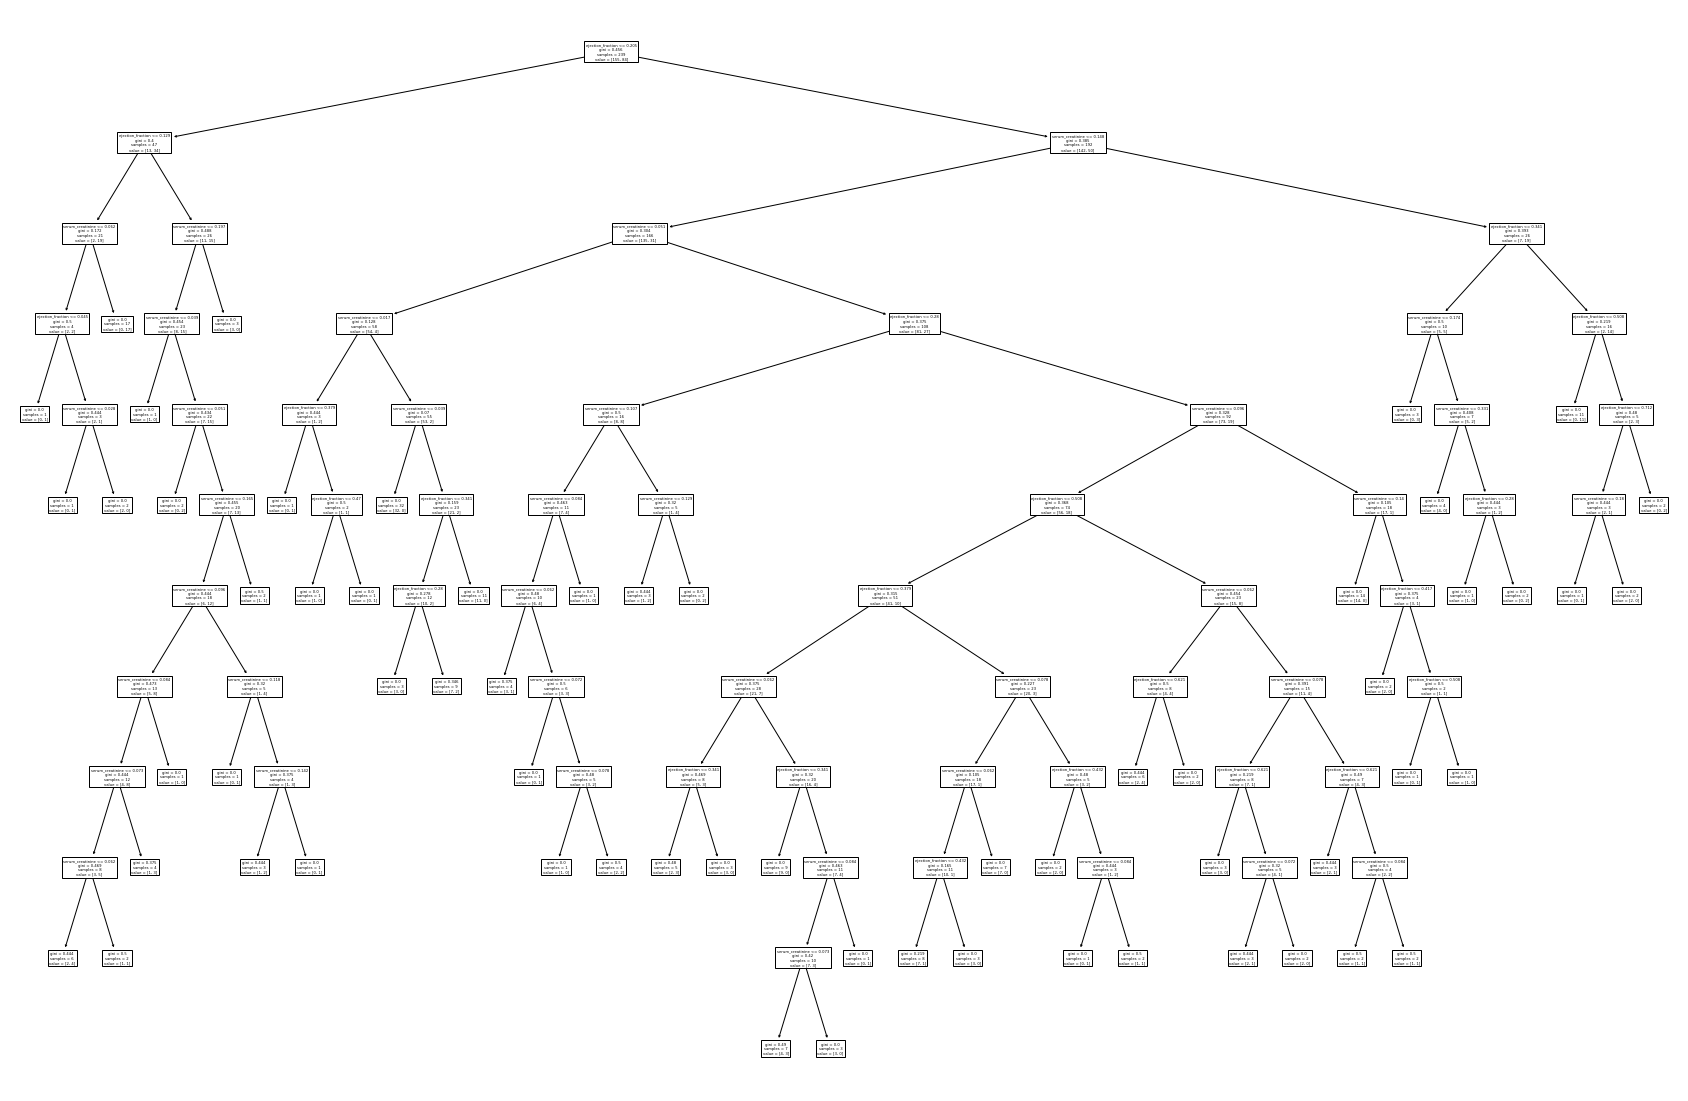

In [ ]:
plot_tree(arvore,feature_names=X2.columns)
plt.show()

In [ ]:
# mudando o tamanho da figura para o tamanho normal
plt.rcParams["figure.figsize"] = (8,6)

#### Usando arvore de decisão para classificação

In [ ]:
# realizando classificação
clf_arvore = arvore.predict(X2_test)
clf_arvore

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0.])

In [ ]:
# script para contar acertos e erros

acertos = 0
erros = 0
for c in range(len(clf_arvore)):
  if y2_test.iloc[c] == clf_arvore[c]:
    acertos += 1
  else:
    erros += 1

print(f"Acertos: {acertos}")
print(f"Erros: {erros}")

Acertos: 45
Erros: 15


#### Avaliando Arvore de Decisão

In [ ]:
# teste de acurácia
acuracia = accuracy_score(y2_test,clf_arvore)
acuracia

0.75

In [ ]:
# calculando precisão
precisao = precision_score(y2_test, clf_arvore)
precisao

0.42105263157894735

In [ ]:
# calculando recall
recall = recall_score(y2_test, clf_arvore)
recall

0.6666666666666666

In [ ]:
# calculando F1-score
f1 = f1_score(y2_test, clf_arvore)
f1

0.5161290322580646

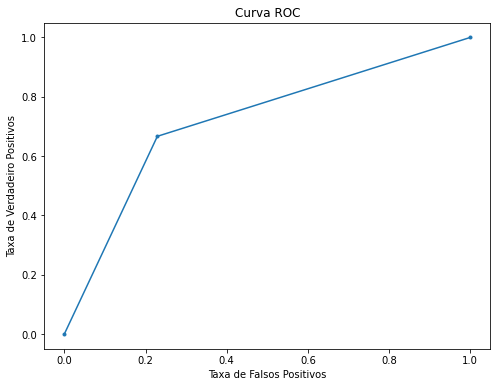

0.7187499999999999


In [ ]:
# curva ROC e sua área
fpr, tpr, _ = roc_curve(y2_test, clf_arvore)
erro = roc_auc_score(y2_test, clf_arvore)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(erro)

#### Avaliando com validação cruzada

In [ ]:
scores = cross_val_score(arvore,X2,y2,cv=5)
scores

array([0.65      , 0.68333333, 0.81666667, 0.75      , 0.74576271])

In [ ]:
# mostrando média e variância dos folds
scores.mean(), scores.var()

(0.7291525423728814, 0.003346752210412077)



---

Podemos observar que os scores dos dados possuem uma variação alta (variando de 0.65 a 0.81), podendo comprometer a analise da acurácia da arvore de decisão. Como foi feito o teste com validação cruzada, os resultados podem ser observados com mais clareza.

---



### **Random Forest**

#### Criando random forest

In [ ]:
# criando e treinando random forest
floresta = RandomForestClassifier(n_estimators=200)
floresta.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# vendo acurácia da random forest
floresta.score(X2_test, y2_test)

0.7166666666666667

#### Usando random forest para classificação

In [ ]:
# usando floresta para classificação
cfl_floresta = floresta.predict(X2_test)
clf_floresta

array([1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0.])

#### Avaliando Random Forest

In [ ]:
# teste de acurácia
f_acuracia = accuracy_score(y2_test,cfl_floresta)
f_acuracia

0.7166666666666667

In [ ]:
# calculando precisão
f_precisao = precision_score(y2_test, cfl_floresta)
f_precisao

0.3684210526315789

In [ ]:
# calculando recall
f_recall = recall_score(y2_test, cfl_floresta)
f_recall

0.5833333333333334

In [ ]:
# calculando F1-score
f_f1 = f1_score(y2_test, cfl_floresta)
f_f1

0.4516129032258065

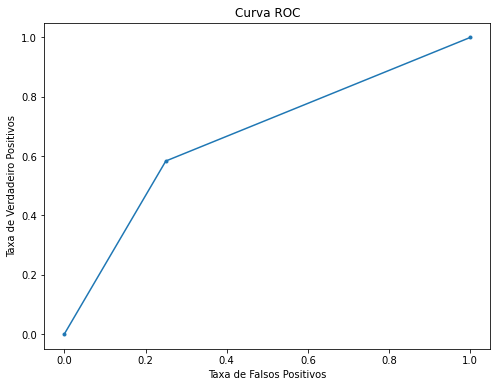

0.6666666666666666


In [ ]:
# curva ROC e sua área
f_fpr, f_tpr, _ = roc_curve(y2_test, cfl_floresta)
erro = roc_auc_score(y2_test, cfl_floresta)
plt.plot(f_fpr,f_tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(erro)

#### Avaliando com Validação Cruzada

In [ ]:
# preparando 5 folds para validação cruzada
scores = cross_val_score(floresta,X2,y2,cv=5)
scores

array([0.68333333, 0.68333333, 0.78333333, 0.78333333, 0.72881356])

In [ ]:
# mostrando média e variância dos folds
scores.mean(), scores.var()

(0.7324293785310734, 0.002003268537138114)

### **Comparando Árvore de Decisão e Random Forest**

In [ ]:
# comparando scores
arvore.score(X2_test, y2_test), floresta.score(X2_test, y2_test)

(0.75, 0.7166666666666667)

In [ ]:
# Comparando acurácia
acuracia, f_acuracia

(0.75, 0.7166666666666667)

In [ ]:
# comparando precisao
precisao, f_precisao

(0.42105263157894735, 0.3684210526315789)

In [ ]:
# comparando recall
recall, f_recall

(0.6666666666666666, 0.5833333333333334)

In [ ]:
# comparando f1
f1, f_f1

(0.5161290322580646, 0.4516129032258065)

In [ ]:
# relação de scores média feita com validação cruzada
a_scores = cross_val_score(DecisionTreeClassifier(),X2,y2,cv=5)
f_scores = cross_val_score(RandomForestClassifier(),X2,y2,cv=5)
print('arvore: ', a_scores)
print('floresta: ', f_scores )
a_scores.mean(), f_scores.mean()

arvore:  [0.65       0.68333333 0.81666667 0.76666667 0.74576271]
floresta:  [0.68333333 0.7        0.8        0.78333333 0.74576271]


(0.7324858757062147, 0.7424858757062147)

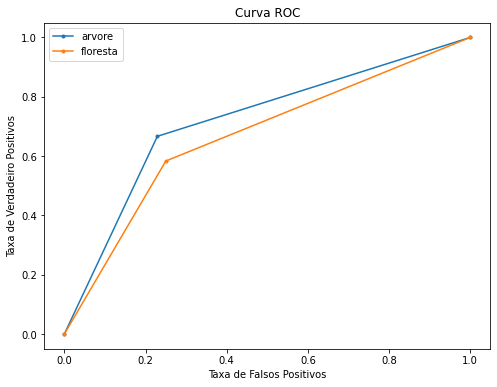

Área sob a curva ROC - floresta: 0.6354166666666666
Área sob a curva ROC - arvore: 0.7187499999999999


In [ ]:
plt.plot(fpr,tpr,marker='.',label='arvore')
plt.plot(f_fpr,f_tpr,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f'Área sob a curva ROC - floresta: {roc_auc_score(y2_test,clf_floresta)}')
print(f'Área sob a curva ROC - arvore: {roc_auc_score(y2_test,clf_arvore)}')

#### Conclusão



---

A mudança dos atributos feita nessa etapa ocasionou algumas melhorias nos valores de avaliação.

OBS1: Chamarei de **m1** o método feito na étapa 6, que consistiu em usar o algoritmo de classificação com todas as colunas dos dados. 

OBS2: Chamarei de **m2** o método feito nesta etapa, que consistiu em usar o algoritmo de classificação com apenas 2 colunas.


*   Score: 
    * O score da arvore de decisão no m2 é maior que no m1.
    * O score da random forest é igual em m1 e m2.
*   Acurácia:
    * A acurácia da arvore de decisão no m2 é maior que no  m1.
    * A acurácia da random forest é igual em m1 e m2.
*   Precisão:
    * A precisão da arvore de decisão no m2 é maior que no  m1.
    * A precisão da random forest no m2 é maior que no m1.
*   Recall:
    * O recall da arvore de decisão no m2 é maior que no  m1.
    * O recall da random forest no m2 é maior que no m1.
*   F1-score:
    * O f1 da arvore de decisão no m2 é maior que no  m1.
    * O f1 da random forest no m2 é maior que no m1.
*   Área sob a curva ROC:
    * A área sob a curva da arvore de decisão no m2 é maior que no  m1.
    * A área sob a curva da random forest no m2 é maior que no m1.
     
Tendo em vista as análises feitas aqui, é possível ter uma taxa de acertos maior se usar o m2 para o treinamento dos algoritmos Arvore de Decisão e Random Forest, com o dataset usado. Porém, é preciso investigar, ainda, se esse aumento 
é consequência da utilização de apenas 2 colunas do dataframe, que fazem maior discriminação entre as classes, no treinamento.




---

